In [1]:
import torch
from torchvision import datasets,transforms
import torchvision
import matplotlib.pyplot as plt
import helper

In [2]:
transform=transforms.Compose(
    [   transforms.Resize(60)
        ,transforms.ToTensor()
        ,transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]
)
dataset=datasets.ImageFolder('D:\Custom made programs\Python\eyes_prediction_sex\data',transform=transform)

In [16]:
dataloader = torch.utils.data.DataLoader(dataset, batch_size=1, shuffle=True)

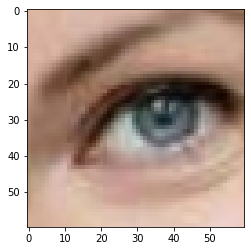

tensor([0])

In [20]:
import numpy as np
images, labels = next(iter(dataloader))

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

imshow(torchvision.utils.make_grid(images))

labels

In [5]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

cuda:0


In [10]:
images.shape

torch.Size([32, 3, 60, 60])

In [14]:
import torch.nn as nn
import torch.nn.functional as F

conv1 = nn.Conv2d(3, 6, 5)
pool = nn.MaxPool2d(2, 2)
conv2 = nn.Conv2d(6, 16, 5)

x=pool(F.relu(conv1(images)))
x=pool(F.relu(conv2(x)))
x=torch.flatten(x,1)
x.shape

torch.Size([32, 2304])